 ### Exercise 15.4

In [57]:
import numpy as np

data = np.random.uniform(size=(500, 10))
method1 = np.random.randint(data.shape[0], size=100)
method2 = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)
print("There were " + str(len(set(method1))) + " unique values recovered from the data using Method 1 described in the 15.4 prompt. \n")
print("There were " + str(len(set(method2))) + " unique values recovered from the data using Method 2 described in the 15.4 prompt.")

There were 88 unique values recovered from the data using Method 1 described in the 15.4 prompt. 

There were 100 unique values recovered from the data using Method 2 described in the 15.4 prompt.


### Exercise 15.5

In [101]:
import numpy as np

arrA = np.random.randint(data.shape[0], size=(10000,3))
arrB = np.random.randint(data.shape[0], size=(10000,3))

row_meansA = np.average(arrA[:, 1:], axis=1)
row_meansB = np.average(arrB[:, 1:], axis=1)

higher_exp_A = []
for i in range(len(row_meansA)):
    if row_meansA[i] > row_meansB[i]:
        higher_exp_A.append(i)

print(str(len(higher_exp_A)) + " genes are more highly expressed in A than in B. \n")

higher_exp_B = []
for i in range(len(row_meansA)):
    if row_meansB[i] > row_meansA[i]*2:
        higher_exp_B.append(i)

print(str(len(higher_exp_B)) + " genes are at least twice as highly expressed in B than in A.")

4933 genes are more highly expressed in A than in B. 

1523 genes are at least twice as highly expressed in B than in A.


 ### Exercise 16.2

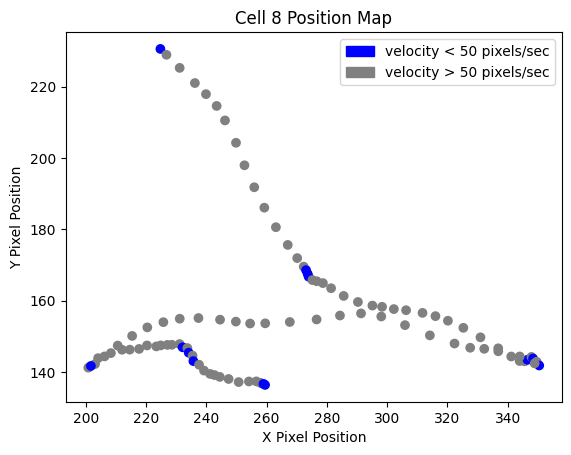

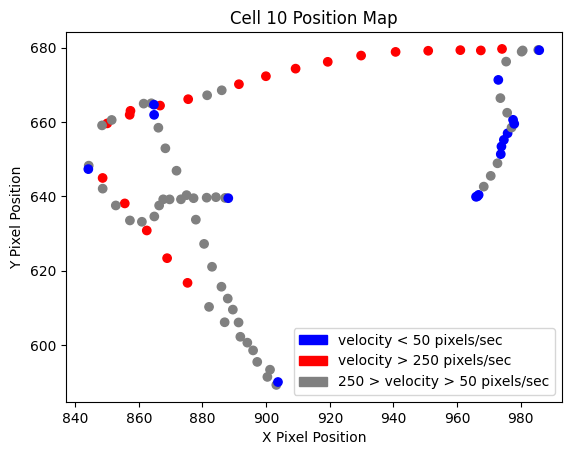

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpt

tf = pd.read_excel("https://raw.githubusercontent.com/lfsc507/lfsc507.github.io/master/data/tracksample.xlsx")

cell_8_x = tf[tf['ID']==8]['X']
cell_8_x = cell_8_x.tolist()
cell_8_y = tf[tf['ID']==8]['Y']
cell_8_y = cell_8_y.tolist()
c8 = np.array([cell_8_x,cell_8_y])

# make an array with lots of little [x,y] lists
coord_list = []
for i in range(len(tf[tf['ID']==8])):
    coord = [cell_8_x[i],cell_8_y[i]]
    coord_list.append(coord)

velocity = [0]
for index, i in enumerate(cell_8_x):
    if index < len(cell_8_x)-1:
        x_dis = cell_8_x[index+1]-cell_8_x[index]
        y_dis = cell_8_x[index+1]-cell_8_x[index]
        xy_dis = ((x_dis**2)+(y_dis**2))**0.5
        dtime = tf['Time'].iloc[index+1] - tf['Time'].iloc[index]
        velocity.append(xy_dis/dtime)

vcolors = []
vlabels = []
for i in velocity:
    if i < 50:
        vcolors.append("blue")
        vlabels.append("velocity < 50 pixels/sec")
    else:
        vcolors.append("grey")
        vlabels.append("velocity > 50 pixels/sec")

blue_patch = mpt.Patch(color="blue", label='velocity < 50 pixels/sec')
grey_patch = mpt.Patch(color="grey", label='velocity > 50 pixels/sec')

plt.scatter(*zip(*coord_list), c = vcolors)
plt.title("Cell 8 Position Map")
plt.xlabel("X Pixel Position")
plt.ylabel("Y Pixel Position")
plt.legend(handles = [blue_patch, grey_patch])
plt.show()

cell_10_x = tf[tf['ID']==10]['X']
cell_10_x = cell_10_x.tolist()
cell_10_y = tf[tf['ID']==10]['Y']
cell_10_y = cell_10_y.tolist()
c10 = np.array([cell_10_x,cell_10_y])

coord_list = []
for i in range(len(tf[tf['ID']==10])):
    coord = [cell_10_x[i],cell_10_y[i]]
    coord_list.append(coord)

velocity10 = [0]
for index, i in enumerate(cell_10_x):
    if index < len(cell_10_x)-1:
        x_dis = cell_10_x[index+1]-cell_10_x[index]
        y_dis = cell_10_x[index+1]-cell_10_x[index]
        xy_dis = ((x_dis**2)+(y_dis**2))**0.5
        dtime = tf['Time'].iloc[index+1] - tf['Time'].iloc[index]
        velocity10.append(xy_dis/dtime)

vcolors10 = []
vlabels10 = []
for i in velocity10:
    if i < 50:
        vcolors10.append("blue")
        vlabels10.append("slow")
    elif i > 250:
        vcolors10.append("red")
        vlabels10.append("fast")
    else:
        vcolors10.append("grey")
        vlabels10.append("normal")

blue_patch = mpt.Patch(color="blue", label='velocity < 50 pixels/sec')
red_patch = mpt.Patch(color="red", label='velocity > 250 pixels/sec')
grey_patch = mpt.Patch(color="grey", label='250 > velocity > 50 pixels/sec')

plt.scatter(*zip(*coord_list), c = vcolors10, label = vlabels10)
plt.title("Cell 10 Position Map")
plt.xlabel("X Pixel Position")
plt.ylabel("Y Pixel Position")
plt.legend(handles = [blue_patch, red_patch, grey_patch])
plt.show()